In [1]:
import matplotlib.pyplot as plt
import numpy as np

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape)
plt.scatter(x_train, y_train)
plt.show()

In [ ]:
#Logistic regression
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

learning_rate = 0.01
training_epochs = 100

w = tf.Variable(0.0)


def model(X, w):
    return tf.multiply(X, w)


y_model = model(X, w)
cost = tf.square(Y-y_model)
train_operation = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_operation, feed_dict={X: x, Y: y})

w_val = sess.run(w)

sess.close()

plt.scatter(x_train, y_train)
y_learned = w * x_train

plt.plot(x_train, y_train, 'r')
plt.show()

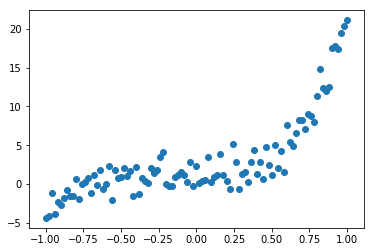

[ 1.01377261  0.50536656  3.67439485  6.30424261  4.08688498  6.3130908 ]


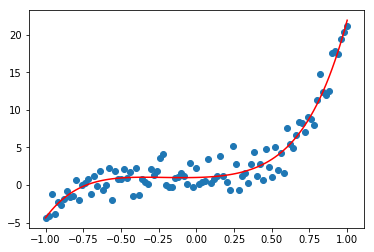

In [13]:
#Polynomial Regression
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 100

tr_x = np.linspace(-1, 1, 101)
no_of_coeffs = 6
tr_c = [i for i in range(1, no_of_coeffs+1)]
tr_y = 0
for i in range(no_of_coeffs):
    tr_y += tr_c[i] * np.power(tr_x, i)

tr_y += np.random.randn(*tr_x.shape) * 1.5

plt.scatter(tr_x, tr_y)
plt.show()

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


def model(X, w):
    terms = []
    for i in range(no_of_coeffs):
        terms.append(tf.multiply(w[i], tf.pow(X, i)))
    return tf.add_n(terms)


w = tf.Variable([0.]*no_of_coeffs, name="wt_parameters")

y_model = model(X, w)
cost = tf.square(Y-y_model)
train_op = tf.train.GradientDescentOptimizer(learning_rate, ).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for _ in range(training_epochs):
    for (x, y) in zip(tr_x, tr_y):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
sess.close()
print(w_val)

plt.scatter(tr_x, tr_y)
test_y = 0
for i in range(no_of_coeffs):
    test_y += w_val[i] * np.power(tr_x, i)
plt.plot(tr_x, test_y, 'r')
plt.show()

In [3]:
import tensorflow as tf
import numpy as np


def split_datasets(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    y_train = y_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_test = y_dataset[arr[num_train:y_dataset.size]]
    
    return x_train, x_test, y_train, y_test


learning_rate = 0.01
training_epochs = 100
reg_lambda = 0.

x_dataset = np.linspace(-1, 1, 101)
num_coeffs = 9
y_params = [0.]*num_coeffs
y_params[2] = 1
y_dataset = 0
for i in range(num_coeffs):
    y_dataset += y_params[i]*np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape)*0.3

x_train, x_test, y_train, y_test = split_datasets(x_dataset, y_dataset, 0.7)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


def model(X, w):
    terms = []
    for i in range(num_coeffs):
        terms.append(tf.multiply(w[i], tf.pow(X, i)))
    return tf.add_n(terms)


w = tf.Variable([0.]*num_coeffs, name="weight_params")

y_model = model(X, w)
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),
                     tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),
              2*x_train.size)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for reg_lambda in np.linspace(0, 1, 100):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: x_train, Y: y_train})
    final_cost = sess.run(cost, feed_dict = {X: x_test, Y:y_test})
    print('reg lambda', reg_lambda) 
    print('final cost', final_cost)

sess.close()


reg lambda 0.0
final cost 0.03969051
reg lambda 0.010101010101010102
final cost 0.030102331
reg lambda 0.020202020202020204
final cost 0.026081754
reg lambda 0.030303030303030304
final cost 0.02384592


reg lambda 0.04040404040404041
final cost 0.022451945
reg lambda 0.05050505050505051
final cost 0.021540502
reg lambda 0.06060606060606061
final cost 0.020931115
reg lambda 0.07070707070707072
final cost 0.02051831
reg lambda 0.08080808080808081
final cost 0.02023572
reg lambda 0.09090909090909091
final cost 0.020040134


reg lambda 0.10101010101010102
final cost 0.019902995
reg lambda 0.11111111111111112
final cost 0.019805275
reg lambda 0.12121212121212122
final cost 0.019734252
reg lambda 0.13131313131313133
final cost 0.019681385
reg lambda 0.14141414141414144
final cost 0.019640945


reg lambda 0.15151515151515152
final cost 0.019609036
reg lambda 0.16161616161616163
final cost 0.019583045
reg lambda 0.17171717171717174
final cost 0.019561185
reg lambda 0.18181818181818182
final cost 0.019542236
reg lambda 0.19191919191919193
final cost 0.019525368


reg lambda 0.20202020202020204
final cost 0.019510003
reg lambda 0.21212121212121213
final cost 0.01949575
reg lambda 0.22222222222222224
final cost 0.019482326
reg lambda 0.23232323232323235
final cost 0.01946954
reg lambda 0.24242424242424243
final cost 0.019457262
reg lambda 0.25252525252525254
final cost 0.019445386
reg lambda 0.26262626262626265
final cost 0.019433847


reg lambda 0.27272727272727276
final cost 0.019422598
reg lambda 0.2828282828282829
final cost 0.019411601
reg lambda 0.29292929292929293
final cost 0.019400835
reg lambda 0.30303030303030304
final cost 0.019390276
reg lambda 0.31313131313131315
final cost 0.019379912
reg lambda 0.32323232323232326
final cost 0.019369733
reg lambda 0.33333333333333337
final cost 0.019359732


reg lambda 0.3434343434343435
final cost 0.019349903
reg lambda 0.3535353535353536
final cost 0.01934024
reg lambda 0.36363636363636365
final cost 0.01933074
reg lambda 0.37373737373737376
final cost 0.019321403
reg lambda 0.38383838383838387
final cost 0.01931222
reg lambda 0.393939393939394
final cost 0.019303195
reg lambda 0.4040404040404041
final cost 0.019294325


reg lambda 0.4141414141414142
final cost 0.01928561
reg lambda 0.42424242424242425
final cost 0.019277044
reg lambda 0.43434343434343436
final cost 0.019268626
reg lambda 0.4444444444444445
final cost 0.019260358
reg lambda 0.4545454545454546
final cost 0.019252235
reg lambda 0.4646464646464647
final cost 0.01924426
reg lambda 0.4747474747474748
final cost 0.019236425


reg lambda 0.48484848484848486
final cost 0.019228734
reg lambda 0.494949494949495
final cost 0.019221183
reg lambda 0.5050505050505051
final cost 0.019213771
reg lambda 0.5151515151515152
final cost 0.0192065
reg lambda 0.5252525252525253
final cost 0.019199362
reg lambda 0.5353535353535354
final cost 0.019192355
reg lambda 0.5454545454545455
final cost 0.019185478


reg lambda 0.5555555555555556
final cost 0.019178737
reg lambda 0.5656565656565657
final cost 0.019172123
reg lambda 0.5757575757575758
final cost 0.019165633
reg lambda 0.5858585858585859
final cost 0.019159267
reg lambda 0.595959595959596
final cost 0.019153027
reg lambda 0.6060606060606061
final cost 0.019146906
reg lambda 0.6161616161616162
final cost 0.019140897


reg lambda 0.6262626262626263
final cost 0.019135015
reg lambda 0.6363636363636365
final cost 0.019129245
reg lambda 0.6464646464646465
final cost 0.019123586
reg lambda 0.6565656565656566
final cost 0.01911804
reg lambda 0.6666666666666667
final cost 0.0191126
reg lambda 0.6767676767676768
final cost 0.019107273
reg lambda 0.686868686868687
final cost 0.019102046


reg lambda 0.696969696969697
final cost 0.019096926
reg lambda 0.7070707070707072
final cost 0.019091906
reg lambda 0.7171717171717172
final cost 0.019086989
reg lambda 0.7272727272727273
final cost 0.019082168
reg lambda 0.7373737373737375
final cost 0.019077437
reg lambda 0.7474747474747475
final cost 0.019072808


reg lambda 0.7575757575757577
final cost 0.019068269
reg lambda 0.7676767676767677
final cost 0.019063825
reg lambda 0.7777777777777778
final cost 0.019059462
reg lambda 0.787878787878788
final cost 0.019055197
reg lambda 0.797979797979798
final cost 0.019051006
reg lambda 0.8080808080808082
final cost 0.019046908


reg lambda 0.8181818181818182
final cost 0.019042887
reg lambda 0.8282828282828284
final cost 0.019038947
reg lambda 0.8383838383838385
final cost 0.019035092
reg lambda 0.8484848484848485
final cost 0.019031305
reg lambda 0.8585858585858587
final cost 0.019027606


reg lambda 0.8686868686868687
final cost 0.01902397
reg lambda 0.8787878787878789
final cost 0.019020418
reg lambda 0.888888888888889
final cost 0.01901693
reg lambda 0.8989898989898991
final cost 0.019013515
reg lambda 0.9090909090909092
final cost 0.019010166
reg lambda 0.9191919191919192
final cost 0.019006882


reg lambda 0.9292929292929294
final cost 0.01900367
reg lambda 0.9393939393939394
final cost 0.019000519
reg lambda 0.9494949494949496
final cost 0.01899743
reg lambda 0.9595959595959597
final cost 0.018994408
reg lambda 0.9696969696969697
final cost 0.018991439


reg lambda 0.9797979797979799
final cost 0.018988533
reg lambda 0.98989898989899
final cost 0.018985687
reg lambda 1.0
final cost 0.018982891


0 8.59892
100 2.74806


200 1.46494
300 1.1765


400 1.11166
500 1.09708


600 1.09381
700 1.09307


800 1.09291
900 1.09287


learned parameters [ 1.39677393 -0.24769135]


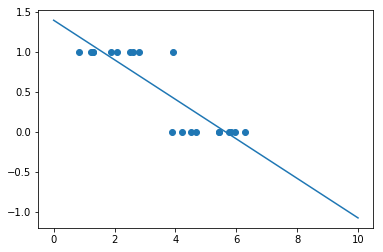

accuracy 0.95


In [15]:
# Linear regression
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)
plt.scatter(xs, labels)

learning_rate = 0.001 
training_epochs = 1000 
X = tf.placeholder("float")
Y = tf.placeholder("float")


def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))


w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y:labels})
    if epoch % 100 == 0:
        print(epoch, current_cost)

w_val = sess.run(w)
print("learned parameters", w_val)


x_test = np.linspace(0, 10, 100)
y_test = x_test*w_val[1] + w_val[0]
plt.plot(x_test, y_test)
plt.show()


#Measuring accuracy
correct_prediction = tf.equal(tf.greater(Y, 0.5), tf.greater(y_model, 0.5))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

sess.close()

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.001
training_epochs = 1000


def sigmoid(x):
    return 1. / (1. + np.exp(-x))


x1 = np.random.normal(-4, 2, 10)
x2 = np.random.normal(4, 2, 10)

xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")

w = tf.Variable([0., 0.], name="weights")
y_model = tf.sigmoid(w[1]*X + w[0])
cost = tf.reduce_mean(-Y * tf.log(y_model)-((1-Y)*tf.log(1-y_model)))

train_op = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
prev_err = 0
for epoch in range(training_epochs):
    err, _ = sess.run([cost, train_op], feed_dict={X: xs, Y: ys})
    if prev_err - err > 0.0001:
        break
    prev_err = err

w_val = sess.run(w)

x_test = np.linspace(-10, 10, 100)

plt.plot(x_test, sigmoid(-(x_test * w_val[1] + w_val[0])))
plt.show()

In [ ]:
# Multidimensional regression

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


learning_rate = 0.01
training_epochs = 2000


def sigmoid(x):
    return 1. / (1. + np.exp(-x))


x1_label_1 = np.random.normal(3, 1, 1000)
x2_label_1 = np.random.normal(2, 1, 1000)
x1_label_2 = np.random.normal(7, 1, 1000)
x2_label_2 = np.random.normal(6, 1, 1000)

x1s = np.append(x1_label_1, x1_label_2)
x2s = np.append(x2_label_1, x2_label_2)
ys = np.asarray([0.]*len(x1_label_1)+[1.]*len(x1_label_2))

X1 = tf.placeholder(tf.float32, name="X1")
X2 = tf.placeholder(tf.float32, name="X2")
Y = tf.placeholder(tf.float32, name="Y")
W = tf.Variable([0., 0., 0.], name="weight_params")

y_model = tf.sigmoid(-(W[2]*X2 + W[1]*X1 + W[0]))
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1-Y) * tf.log(1 - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], feed_dict={X1: x1s, X2: x2s, Y: ys})
        if abs(err-prev_err) < 0.05:
            break
    w_val = sess.run(W)
    print("w", w_val)
    
    
x1_boundary, x2_boundary = [], []

for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-(w_val[2]*x2_test+w_val[1]*x1_test+w_val[0]))
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)

            
plt.scatter(x1_boundary, x2_boundary, c='b')
plt.scatter(x1_label_1, x2_label_1, c='r')
plt.scatter(x1_label_2, x2_label_2, c='g')
plt.show()

